
# COVID-Team-1
### Dr. Mohanty
### Christopher Brantley
### CSC 405 01
### Last Updated: 09/20/2020
### I, Christopher Brantley, have abided by the UNCG academic policy.

In [ ]:
"""Displays the Demographics and Housing enrichment dataframe, 
demonstrates the merging of the enrichment data with the primary data, 
and shows calculated trends for the last week of Covid data.
"""

### Changing Directory.

In [2]:
cd ..

/home/christopherbrantley/Documents/UNCG/FALL 2020/csc405/COVID-Team-1/src


### Importing Modules.

In [3]:
# Import sets up ipynb's to be accessible through "ipynb.fs.full/def".
import ipynb
# ipynb.fs.full allows access to all functions and definitions.
from ipynb.fs.full import covid_data as cd
# Access to dataframe objects and manipualators.
import pandas as pd
# Numpy will be used to generate ranges of numbers.
import numpy as np

### Setting Pandas Display Options.

In [4]:
# Telling pandas not convert to html tags.
pd.set_option('display.notebook_repr_html', False)
# Max columns and rows to display.
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 5)

### Specifying the Names of the Attributes we will be using.

In [5]:
attributes_DP = ["GEO_ID", "DP05_0002E","DP05_0003E"\
                , "DP05_0004E","DP05_0019E", "DP05_0021E"\
                , "DP05_0023E", "DP05_0018E", "DP05_0086E"]

attribute_names = ["GEO_ID", "population_male", "population_female"\
                 , "sex_ratio", "under_18", "over_18"\
                 , "over_or_62", "median_age", "total_housing"]

# Reverse is necessary to give the desired order when populating DataFrame.
attributes_DP.reverse()
attribute_names.reverse()

### Creating our Dataframe.

In [6]:
# Reading in general data.
df_housing = pd.read_csv(cd._housing_demographics_path)
df_housing_modified = pd.DataFrame()

# Pulling out the attributes that we specified above.
# The first row is given the attribute name, we will later reset the columns to the first row's values.
for attribute, name in zip(attributes_DP, attribute_names):
    df_housing_modified.insert(0, attribute, df_housing[attribute])
    df_housing_modified[attribute][0] = (name)
# Linear comprehension is used to create a series consisting of the last five digits of each GEO_ID, yields countyFIPS.
countyFIPS_Series = pd.Series(["countyFIPS"]).append(pd.Series([int(x[-5:]) for x in df_housing_modified["GEO_ID"][1::]], dtype = int))
# Because of the concatenation of two series (duplicates exist), we must reset the index.
countyFIPS_Series.index = np.arange(0,len(countyFIPS_Series))
# We insert our new attribute into the first position of our dataframe.
df_housing_modified.insert(0, "countyFIPS", countyFIPS_Series)
# We drop "GEO_ID", it is no longer needed.
df_housing_modified.drop("GEO_ID", axis = 1, inplace = True)
# We unobfuscate our column names.
df_housing_modified.columns = df_housing_modified.iloc[0]
# We drop our first row, the column names now represent this data).
df_housing_modified.drop(0,inplace = True)

### Display of Housing and Demographics Dataframe.

In [7]:
df_housing

             GEO_ID                             NAME  \
0                id             Geographic Area Name   
1    0500000US01103           Morgan County, Alabama   
..              ...                              ...   
837  0500000US72135  Toa Alta Municipio, Puerto Rico   
838  0500000US72137  Toa Baja Municipio, Puerto Rico   

                                  DP05_0001E  ...  \
0    Estimate!!SEX AND AGE!!Total population  ...   
1                                     119089  ...   
..                                       ...  ...   
837                                    71094  ...   
838                                    74623  ...   

                                            DP05_0089M  \
0    Margin of Error!!CITIZEN, VOTING AGE POPULATIO...   
1                                                  695   
..                                                 ...   
837                                                 85   
838                                                391

### Display of Modified Housing and Demographics Dataframe.

In [8]:
df_housing_modified

0   countyFIPS population_male population_female  ... over_or_62 median_age  \
1         1103           59216             59873  ...      25752       40.7   
2         6031           83591             67775  ...      19049       32.0   
..         ...             ...               ...  ...        ...        ...   
837      72135           34421             36673  ...      12265       40.1   
838      72137           34856             39767  ...      17405       42.0   

0   total_housing  
1           52284  
2           46649  
..            ...  
837         26421  
838         34796  

[838 rows x 9 columns]

### Merging Primary Covid Data with Enrichment Data.

In [9]:
df_covid = cd.get_covid_primary_data()
df_covid = pd.merge(df_covid, df_housing_modified, how = "inner", on = "countyFIPS")

### Display of Merged Data (Primary Covid Data and Enrichment Data).

In [10]:
df_covid

    countyFIPS     County Name State  ...  over_or_62  median_age  \
0         1003  Baldwin County    AL  ...       53676        44.0   
1         1015  Calhoun County    AL  ...       24963        40.1   
..         ...             ...   ...  ...         ...         ...   
816      56021  Laramie County    WY  ...       20414        37.9   
817      56025  Natrona County    WY  ...       15219        37.2   

     total_housing  
0           116632  
1            53888  
..             ...  
816          43892  
817          37181  

[818 rows x 491 columns]

### Isolating Data on Florida.

In [11]:
# Retrieving all rows of data where State is Florida.
df_covid_florida = df_covid[df_covid["State"] == "FL"]
# regex is used to match with all values that contain "case" or "County Name".
df_covid_cases_final_week = df_covid_florida.filter(regex = "case|County Name")
# -7,1,1 index is used to retrieve last week of Covid data and County Names.
df_covid_cases_final_week = df_covid_cases_final_week.iloc[:, range(-7,0,1)] 

### Display of the Last Week of Covid Data for Florida.

In [12]:
df_covid_cases_final_week

     cases - 9/10/20  cases - 9/11/20  cases - 9/12/20  cases - 9/13/20  \
108             5898             6029             6241             6401   
109             5583             5622             5659             5682   
..               ...              ...              ...              ...   
147             9931            10027            10103            10160   
148             1774             1790             1803             1812   

     cases - 9/14/20  cases - 9/15/20  cases - 9/16/20  
108             6555             6657             6814  
109             5693             5719             5732  
..               ...              ...              ...  
147            10197            10262            10307  
148             1830             1840             1853  

[41 rows x 7 columns]

### Cases by County.

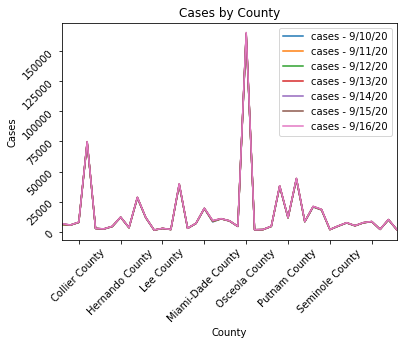

In [17]:
ax0 = df_covid_cases_final_week.plot(title = "Cases by County")
# This code will create the necessary slices to include the county names.
# County names are verified by the original tick labels being the row index within dataframe.
ax0.set_xticklabels([str(x).strip("[|]|'") for x in df_covid[110:150:5].filter(regex = "County Name").values.tolist()])
ax0.set_ylabel("Cases")
ax0.set_xlabel("County")
ax0.tick_params(rotation = 45)

### Analysis:

#### We can see that Miami-Dade county has the top number of cases. We can also see that for all counties that the number of cases don't deviate too far from each other, there are only minor variances day to day.

In [14]:
df_covid[130:131].filter(regex = "cases - 9/16/20|County Name")

           County Name  cases - 9/16/20
130  Miami-Dade County           165147

### Daily Cases Summed.

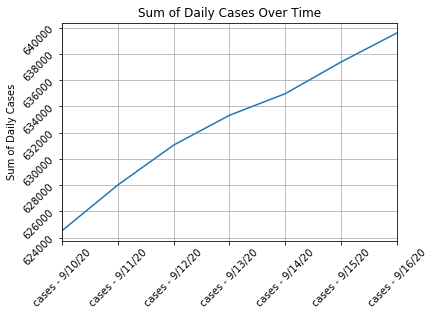

In [15]:
ax1 = df_covid_cases_final_week.sum().plot(grid = True, title = "Sum of Daily Cases Over Time")
ax1.set_ylabel("Sum of Daily Cases")
ax1.tick_params(rotation = 45)

### Analysis:

#### When we look at the summation of cases on a day by day basis we see a positive slope which is an indication that the number of cases are increasing over time. The plotted line starts leveling off around 9/13/20 - 9/14/20 but picks right back up. For the most part the plotted line is relatively consistent and indicates that the number of cases is increasing at a constant rate.

### Median of Daily Cases.

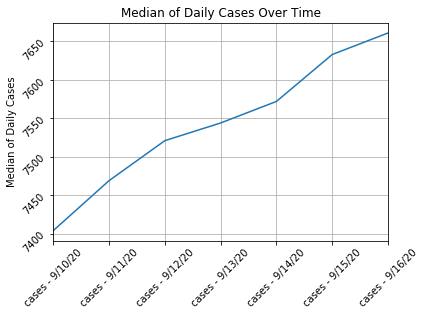

In [16]:
ax2 = df_covid_cases_final_week.median().plot(grid = True, title = "Median of Daily Cases Over Time")
ax2.set_ylabel("Median of Daily Cases")
ax2.tick_params(rotation = 45)

### Analysis:

#### When we look at the median of cases on a day by day basis we see much more turmoil in the plotted line as opposed to the plot of summation of cases day by day. In general the trend of the median of daily cases is increasing. We see a similar but more drastic leveling off around 9/12/20 through 9/14/20 and from 9/15/20 onward.

#### In conclusion, the trend for the last week of Covid cases on a day by day basis is that the number of cases is increasing.